In [1]:
import pandas as pd

In [3]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("train.csv")

In [11]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [13]:
print (df.describe(include='all'))

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

In [15]:
print("\n--- .value_counts() for Categorical Columns ---")
for col in ['Sex', 'Embarked', 'Cabin']:
    print(f"\n{col}:\n", df[col].value_counts())



--- .value_counts() for Categorical Columns ---

Sex:
 Sex
male      577
female    314
Name: count, dtype: int64

Embarked:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Cabin:
 Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64


In [17]:
#  Clean Data for Visualization
columns_to_use = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for col in columns_to_use:
    df[col] = pd.to_numeric(df[col], errors='coerce')
clean_df = df[columns_to_use].dropna()

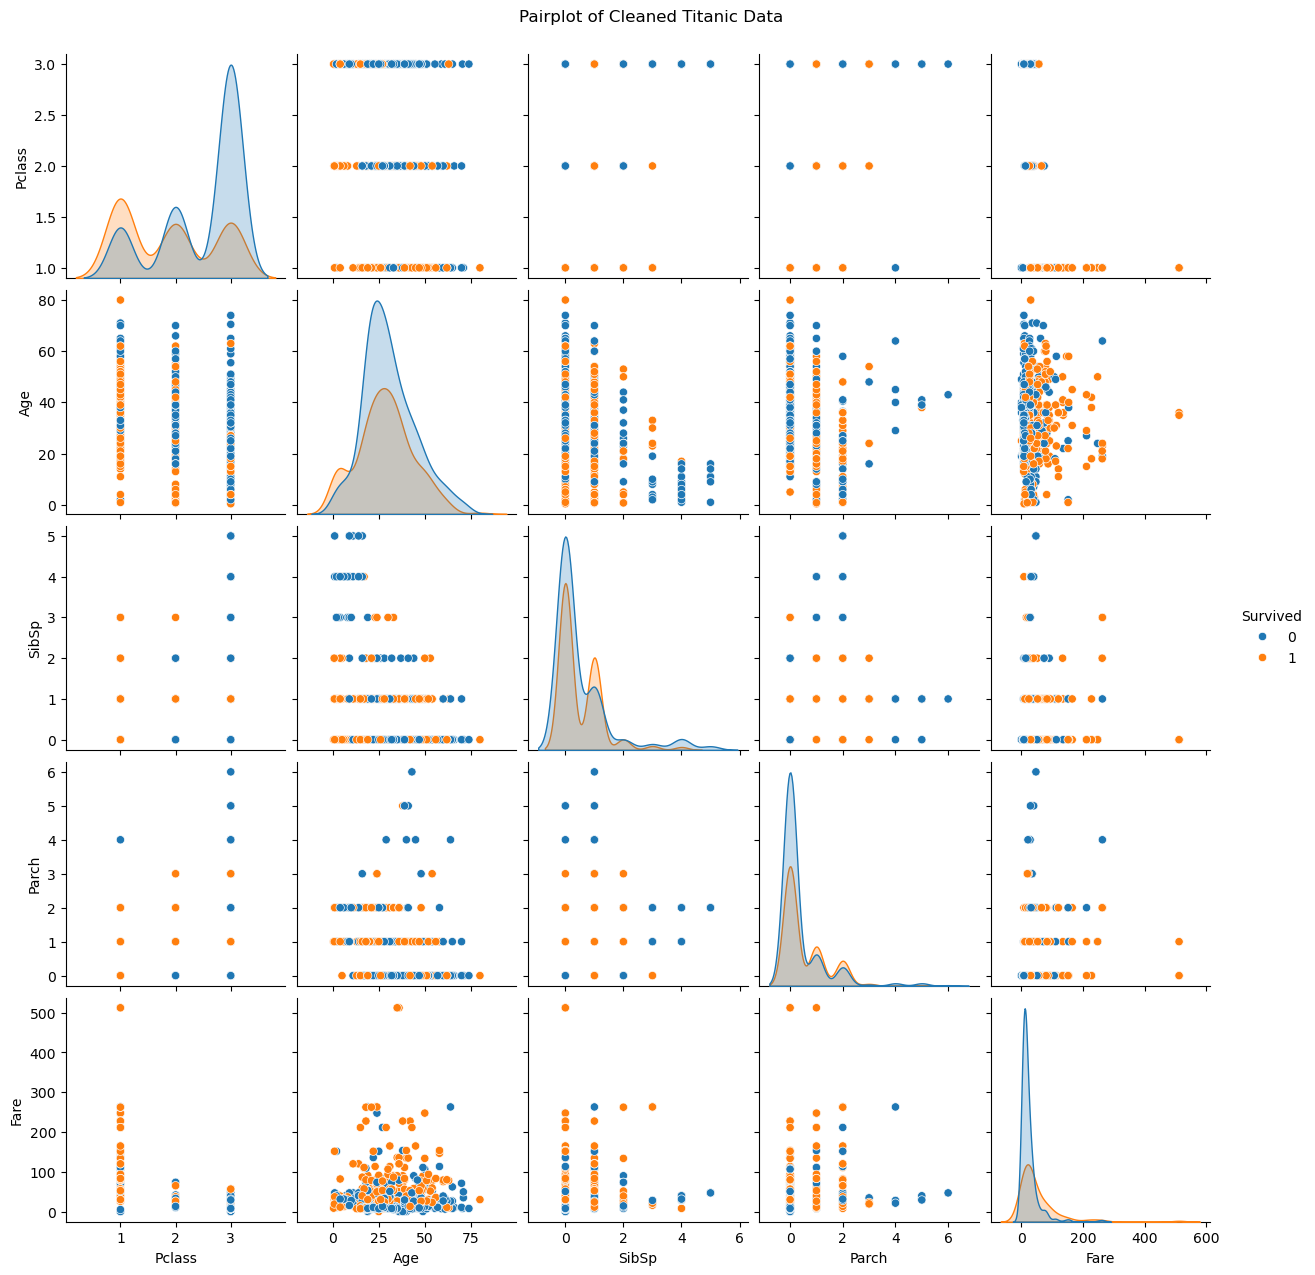

In [19]:
#  Pairplot
sns.pairplot(clean_df, hue='Survived')
plt.suptitle("Pairplot of Cleaned Titanic Data", y=1.02)
plt.show()

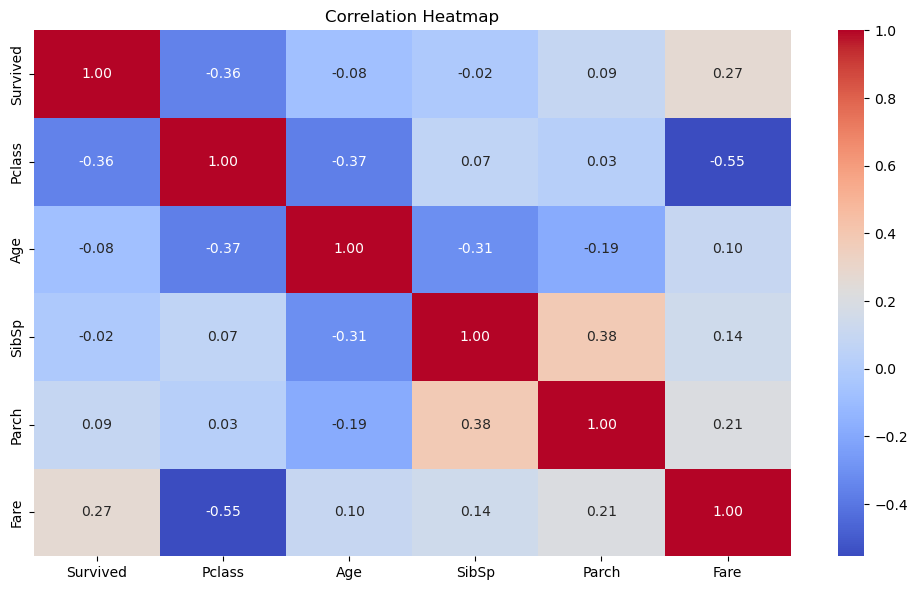

In [21]:
#  Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(clean_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

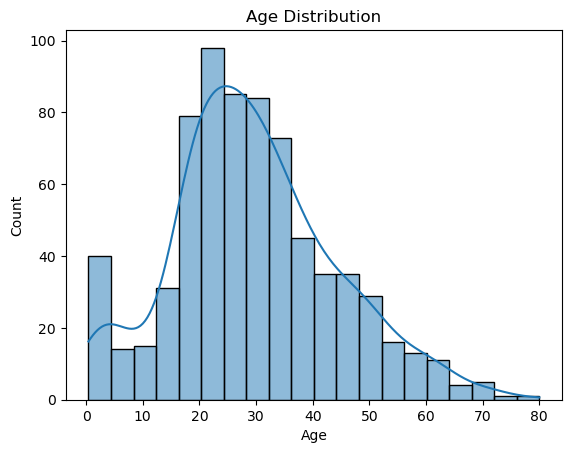

In [23]:
# Histogram of Age
plt.figure()
sns.histplot(df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

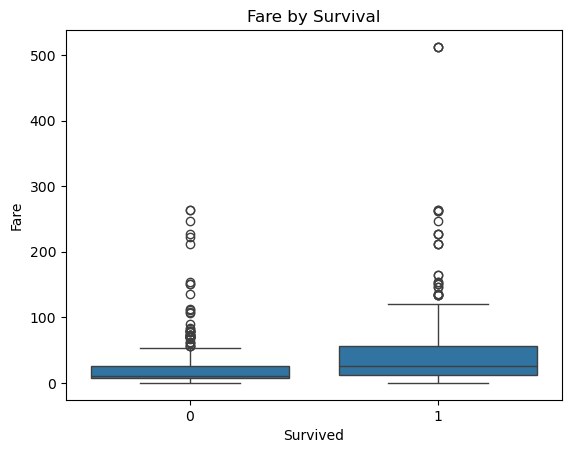

In [25]:
# Boxplot: Fare vs Survived
plt.figure()
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare by Survival")
plt.show()

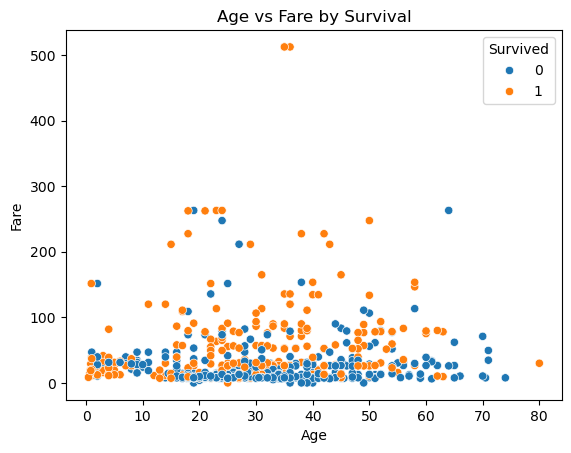

In [27]:
# Scatterplot: Age vs Fare
plt.figure()
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare by Survival")
plt.show()

In [31]:
#OBSERVATIONS : Most passengers who paid higher fares had a higher survival rate.Class (Pclass) and survival are strongly related.#Women and children were more likely to survive.

#SUMMARY OF FINDINGS : Survival was influenced by multiple factors such as Fare, Pclass, and Age.Fare shows a positive correlation with survival.

#The dataset contains missing values in Age, Cabin, Embarked, which should be addressed for deeper modeling.